# KerasでMnistデータを学習(全結合型NN)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.6088 - acc: 0.8499 - val_loss: 0.3406 - val_acc: 0.9099
Epoch 2/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.3309 - acc: 0.9085 - val_loss: 0.2983 - val_acc: 0.9171
Epoch 3/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.3020 - acc: 0.9154 - val_loss: 0.2851 - val_acc: 0.9197
Epoch 4/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.2883 - acc: 0.9192 - val_loss: 0.2805 - val_acc: 0.9214
Epoch 5/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.2806 - acc: 0.9216 - val_loss: 0.2732 - val_acc: 0.9238
Epoch 6/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.2748 - acc: 0.9232 - val_loss: 0.2723 - val_acc: 0.9238
Epoch 7/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.2709 - acc: 0.9246 - val_loss: 0.2719 - val_acc

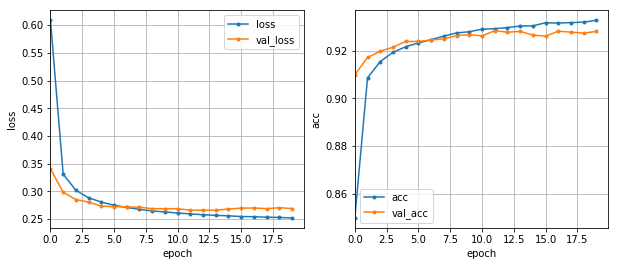

In [3]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, InputLayer
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
# MNISTデータを読込む
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train  = x_train.reshape(60000, 784)#トレーニングデータを60000行784列の行列に変形
x_test   = x_test.reshape(10000, 784)#テストデータを10000行784列の行列に変形
x_train  = x_train.astype('float32')#データをfloat型に変換
x_test   = x_test.astype('float32')#同上
x_train /= 255#データの範囲を0~255から0~1に変換
x_test  /= 255#同上
y_train  = keras.utils.to_categorical(y_train, 10)#答えのデータを0,1に変換
y_test   = keras.utils.to_categorical(y_test, 10)#同上

# モデルの構築
model = Sequential()
model.add(InputLayer(input_shape=(784,)))#入力を784次元にする
model.add(Dense(10, activation='softmax'))#出力は10次元で、それぞれsoftmax関数を損失関数とする
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# 学習
epochs = 20#60000のトレーニングデータを20周する
batch_size = 128#60000のデータを128個ずつ学習する
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

# 検証
score = model.evaluate(x_test, y_test, verbose=1)
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
loss     = history.history['loss']
val_loss = history.history['val_loss']

nb_epoch = len(loss)
acc     = history.history['acc']
val_acc = history.history['val_acc']
nb_epoch = len(loss)
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].plot(loss, marker='.', label='loss')
ax[0].plot(val_loss, marker='.', label='val_loss')
ax[0].legend(loc='best')
ax[0].grid(True)
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('loss')
ax[0].set_xlim(0)
ax[1].plot(acc, marker='.', label='acc')
ax[1].plot(val_acc, marker='.', label='val_acc')
ax[1].legend(loc='best')
ax[1].grid(True)
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('acc')
ax[1].set_xlim(0)
plt.show()

#### 全結合層でMNISTを学習した。入力層と出力層だけの非常に簡単な構成だが、識別率は90%を超えており、MNISTが非常に簡単なデータだとわかった

# KerasでCIFAR10を学習(全結合型NN)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 5s 100us/step - loss: 6.1200 - acc: 0.2196 - val_loss: 6.0481 - val_acc: 0.2058
Epoch 2/20
50000/50000 [==============================] - 4s 88us/step - loss: 6.0857 - acc: 0.2575 - val_loss: 6.2768 - val_acc: 0.2677
Epoch 3/20
50000/50000 [==============================] - 4s 88us/step - loss: 6.0654 - acc: 0.2704 - val_loss: 6.0514 - val_acc: 0.2478
Epoch 4/20
50000/50000 [==============================] - 4s 88us/step - loss: 6.0471 - acc: 0.2825 - val_loss: 6.0478 - val_acc: 0.2862
Epoch 5/20
50000/50000 [==============================] - 5s 91us/step - loss: 6.0692 - acc: 0.2921 - val_loss: 6.1188 - val_acc: 0.2820
Epoch 6/20
50000/50000 [==============================] - 4s 88us/step - loss: 6.0619 - acc: 0.2906 - val_loss: 6.1498 - val_acc: 0.2894
Epoch 7/20
50000/50000 [==============================] - 5s 97us/step - loss: 6.0656 - acc: 0.2982 - val_loss: 6.0853 - val_ac

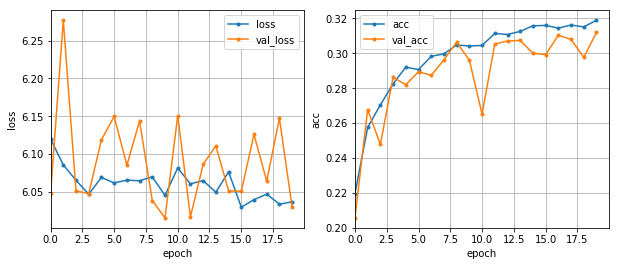

In [3]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, InputLayer
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt

(X_train,Y_train),(X_test,Y_test) = cifar10.load_data()

X_train  = X_train.reshape(50000, 3072)#トレーニングデータを60000行784列の行列に変形
X_test   = X_test.reshape(10000, 3072)#テストデータを10000行784列の行列に変形
X_train  = X_train.astype('float64')#データをfloat型に変換
X_test   = X_test.astype('float64')#同上
X_train /= 255#データの範囲を0~255から0~1に変換
X_test  /= 255#同上
Y_train  = keras.utils.to_categorical(Y_train, 10)#答えのデータを0,1に変換
Y_test   = keras.utils.to_categorical(Y_test, 10)#同上

# モデルの構築
model = Sequential()
model.add(InputLayer(input_shape=(3072,)))#入力を784次元にする
model.add(Dense(10, activation='relu'))#出力は10次元で、それぞれsoftmax関数を損失関数とする
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# 学習
epochs = 20#60000のトレーニングデータを50周する
batch_size = 128#60000のデータを128個ずつ学習する
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, Y_test))

# 検証
score = model.evaluate(X_test, Y_test, verbose=1)
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
loss     = history.history['loss']
val_loss = history.history['val_loss']
nb_epoch = len(loss)
acc     = history.history['acc']
val_acc = history.history['val_acc']
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].plot(loss, marker='.', label='loss')
ax[0].plot(val_loss, marker='.', label='val_loss')
ax[0].legend(loc='best')
ax[0].grid(True)
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('loss')
ax[0].set_xlim(0)
ax[1].plot(acc, marker='.', label='acc')
ax[1].plot(val_acc, marker='.', label='val_acc')
ax[1].legend(loc='best')
ax[1].grid(True)
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('acc')
ax[1].set_xlim(0)
plt.show()

#### 全結合層でCIFAR10を識別しようとした。CIFAR10はRGBからなる3チャンネルを持っているが、今回のモデルではチャンネルを全て一緒くたにして学習をしているので、うまく学習できていない。エポック数が進んでもlossは落ちず、識別率も30%程度となっている。完全ランダムだと10%なので少しは識別できていると考えられる。